## Instructions {-}
Ce sujet est constitué de deux parties : la partie 1 correspond au sujet donné l'an dernier, dont la correction vous est donnée, la partie 2 constitue la partie qui sera évaluée et se place dans la continuité de la partie 1.

# Enoncé du problème (Partie 1)

L'objectif de ce projet est d'estimer la longueur de câble sous-marin nécessaire pour relier deux côtes $A$ et $B$  en utilisant des simulations conditionnelles.


Le câble reposera sur le fond marin dont la profondeur est inconnue.
Le segment $[AB]$ est discrétisé par une séquence de (N+1) points. On pose $x_0=A$ et pour $i=1,\dots,N$, $$x_i=x_0+i\Delta$$ où $$\Delta = \frac{AB}{N}$$ de telle sorte que $x_N=B$.
On note $z(x)$ la profondeur du fond marin au point $x$ de telle sorte 
qu'on pourra estimer la longueur totale de câble nécessaire par la somme 
des longueurs sur les segments de la discrétisation :

$$l=\sum_{i=1}^N\sqrt{\Delta^2+(z(x_i)-z(x_{i-1}))^2}.$$

Enfin, notons que l'on dispose d'un ensemble de $n$ observations de la 
profondeur que l'on supposera situées sur des points de discrétisation $z(x_{j_1}),\dots,z(x_{j_n})$.


On adopte un modèle probabiliste pour la profondeur. On suppose que le vecteur des 
profondeurs sur les points de discrétisation 
$\mathbf{z}=(z(x_0),\dots,z(x_N))$ est la réalisation
d'un vecteur aléatoire gaussien $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$ 
dont le vecteur d'espérance ne contient qu'une seule valeur $\mu$ 
répétée $N+1$ fois et dont la matrice de covariance $\Sigma$ a pour termes $\sigma_{ij}$
définis par $\sigma_{ij}=C(|x_i-x_j|)$ où $C$ est une
fonction décroissante, traduisant le fait que deux points 
géographiquement proches ont tendance à avoir des profondeurs plus similaires que deux points éloignés.

On supposera que la matrice de covariance ainsi 
générée est définie-positive (en fait, $C$ sera choisie parmi les fonctions qui, 
appliquées aux termes d'une matrice de distance, produisent des matrices définie-positives). 

Si on note $L$ la variable aléatoire donnant la longueur de cable nécessaire : 
$$L=\sum_{i=1}^N\sqrt{\Delta^2+(Z(x_i)-Z(x_{i-1}))^2},$$
un bon estimateur de $L$ est fourni par l'espérance conditionnelle 

$$L^\star=E[L|Z(x_{j_1})=z(x_{j_1}),\dots,Z(x_{j_n})=z(x_{j_n})].$$
                                                                              
Cependant, cette quantité est difficilement accessible par le calcul. 
On va donc avoir recours à des
simulations conditionnelles. C'est-à-dire que l'on va simuler 
un nombre $K$ de réalités (disons des réalisations du modèle 
probabiliste choisi), et sur chacune d'entre elle, 
la quantité de câble nécessaire sera évaluée. 
On disposera ainsi d'un échantillon $l_{(1)},\dots,l_{(K)}$ de 
longueures simulées. Puis on approchera l'espérance conditionnelle  par 
$$L^\star=\frac1{K}\sum_{k=1}^K l_{(k)}.$$

L'objectif de ce projet est donc d'écrire un code permettant 
d'effectuer cette simulation conditionnelle, puis de l'appliquer 
au jeu de données fourni et d'en déduire une estimation de la longueur de câble nécessaire.

## Questions théoriques

1. Quel théorème du cours nous autorise-t-il à estimer l'espérance conditionnelle par la moyenne empirique de simulations conditionnelles ?

*la loi forte des grands nombres, cf [Proba IV p.16](https://boisgera.github.io/CDIS/output/Probabilit%C3%A9%20IV.pdf), en vérifiant que $L$ est bien intégrable*

2. Rappeler la loi conditionnelle du vecteur des composantes de $\mathbf{Z}$ correspondant aux points de discrétisation
sans observation, connaissant les valeurs prises par les composantes aux sites d'observation.

*cf. [Proba III p.18](https://boisgera.github.io/CDIS/output/Probabilit%C3%A9%20III.pdf),*

3. Si $\mathbf{Y}=(Y_1,\dots,Y_p)$ est un vecteur de composantes gaussiennes indépendantes, toutes d'espérance nulle et de variance 1, 
quelle est la loi du vecteur $\mathbf{Z}=m+R\mathbf{Y}$ où $R$ est une matrice $p\times p$ et $m$ est un vecteur de taille $p$ ?

*cf. [Proba V p.12](https://cloud.mines-paristech.fr/index.php/s/GLDwtTAMOJCYk3i/download)*

4. En déduire un algorithme de simulation conditionnelle.

*Appliquer l'algorithme de la q.3 à la loi conditionnelle (on calculera en particulier l'espérance conditionnelle de $\mathbf{Z}$ sachant les données et la décomposition de Cholesky de la matrice de covariance conditionnelle sachant les données).*

## Données du problème
Conventionnellement, $A$ est l'origine, $B=500$, $N=100$.

Les données $$\begin{array}{c|r}i & z(x_i)\\
\hline
0 & 0\\
20 & -4\\
40 & -12.8\\
60 & -1\\
80 & -6.5\\
100 & 0\end{array}$$

L'espérance de chaque composante du vecteur aléatoire $\mathbf{Z}$ est donnée par $\mu=-5.$

La fonction $C$ est définie par $$C(h)=\sigma^2 e^{-|h|/a},$$

où $|h|$ correspond à la distance entre deux points, $a=50$ et $\sigma^2=12$.


## Implémentation

### Préambule

In [551]:
#Chargement de dépendances
from math import *
import numpy as np
import matplotlib.pyplot as plt

#Discrétisation
A=0
B=500
N=101 #Nombre de points de discrétisation
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta
#Paramètres du modèle

mu=-5
a = 50
sigma2 = 12

#Données

observation_indexes = [0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])

#Indices des composantes correspondant aux observations et aux componsantes non observées

unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))


### Questions

1. Ecrire une fonction qui prend en argument la distance entre les points, le paramètre $a$, et le paramètre $\sigma^2$, et qui retourne la covariance entre deux points.
On pourra fournir une matrice de distance à cette fonction. Dans ce cas, la fonction renverra la matrice de covariance.

In [552]:
#Fonction C

def Covexp(dist,rangeval,sigmaval):
    return sigmaval * np.exp(-dist/rangeval)


2. Calculer la matrice de distance.

In [553]:
distmat=abs(np.subtract.outer(discretization,discretization))

3. Calculer la matrice de covariance du vecteur $\mathbf{Z}=(Z(x_0),\dots,Z(x_N))$.

In [554]:
Sigma=Covexp(distmat,a,sigma2)

4. Extraire les 3 matrices de covariance suivantes :

 * entre les observations

 * entre les observations et les inconnues

 * entre les inconnues


In [555]:
SigmaObs = Sigma[observation_indexes,:][:,observation_indexes]
SigmaObsUnknown = Sigma[observation_indexes,:][:,unknown_indexes]
SigmaUnknown = Sigma[unknown_indexes,:][:,unknown_indexes]

5. Calculer l'espérance conditionnelle des composantes non observées connaissant les observations et la représenter avec les données.

In [556]:
invSigma = np.linalg.inv(SigmaObs) 
Ec= mu+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-mu))

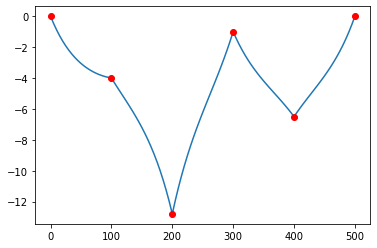

In [557]:
allval1 = np.zeros(N)
allval1[unknown_indexes]=Ec
allval1[observation_indexes]=depth
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()

6. Calculer la matrice de variance conditionnelle et tracer sa diagonale (variance conditionnelle) en fonction de la position. Commenter.

In [558]:
SigmaCond = SigmaUnknown - np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),SigmaObsUnknown))

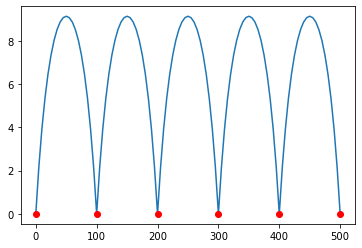

In [559]:
allval2 = np.zeros(N)
allval2[unknown_indexes]=np.diag(SigmaCond)
plt.plot(discretization,allval2)
plt.plot(discretization[observation_indexes], np.zeros(np.shape(observation_indexes)[0]), 'ro')
plt.show()

*On voit ici que la variance est nulle aux points de données (puisque la valeur est fixée) puis qu'elle augmente lorsqu'on s'éloigne des données*

7. Effectuer une simulation conditionnelle. Sur un même graphique, tracer la simulation ainsi que les données et l'espérance conditionnelle. Commenter.

In [560]:
Cholesky = np.linalg.cholesky(SigmaCond)
x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
simu = Ec + np.matmul(Cholesky,x)

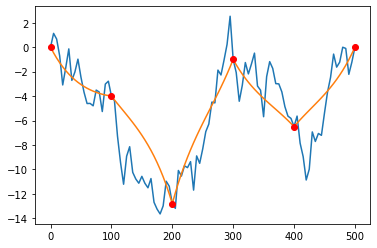

In [561]:
allval3 = np.zeros(N)
allval3[unknown_indexes]=simu
allval3[observation_indexes]=depth
plt.plot(discretization,allval3)
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.show()

*l'espérance conditionnelle est lisse car c'est la fonction des données qui minimise la variance ; la simulation conditionnelle reproduit les fluctuations du modèle et donc l'aspect du fond marin*

8. Ecrire une fonction qui calcule la longueur du câble en fonction du vecteur des profondeurs et du pas de discrétisation.

In [562]:
def length(z,delta):
    return sum(np.sqrt(Delta**2+(z[1:N]-z[0:-1])**2))

9. Utiliser cette fonction pour calculer la longueur du câble à partir de 100 simulations. Comparer l'espérance conditionnelle (estimée) de la longueur avec la longueur de l'espérance conditionnelle.

In [563]:
K=10000
L=0
result = np.zeros(K)
for i in range(K):
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    allval3[unknown_indexes]=Ec + np.matmul(Cholesky,x)
    result[i]=length(allval3,Delta)
    


In [564]:
sum(result)/K

522.4173631545278

In [565]:
length(allval1,Delta)

501.6468416918411

*On donne ici directement les résultats pour 100000 simulations (comparer la vitesse d'éxécution avec votre code pour voir l'intérêt de la vectorisation).*

*On voit ici que la longueur donnée par l'espérance conditionnelle est bien moindre que la longueur d'une simulation conditionnelle. Ceci est dû au fait que la simulation conditionnelle va reproduire les fluctuations attendues, au contraire de l'espérance conditionnelle qui minimise la variance.*

*NB : On remarquera que c'est le seul endroit où on a utilisé une boucle dans cette correction. On aurait pu s'en passer en utilisant notamment les outils de la librairie Pandas mais le code est plus lisible ainsi.*

10. Représenter la suite $M_n$ des moyennes des longueurs de câbles en fonction du nombre de simulations. Commenter.

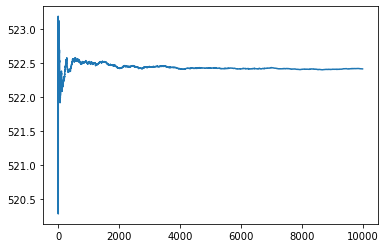

In [566]:
indice_simu = 1+np.arange(K)
plt.plot(indice_simu,np.cumsum(result)/indice_simu)
plt.show()

*Comme attendu d'après la LFGN, on observe une stabilisation de la valeur moyenne. Les variations sont imperceptibles après quelques dizaines de milliers de simulations*

11. Représenter l'histogramme des longueurs de câbles générées.

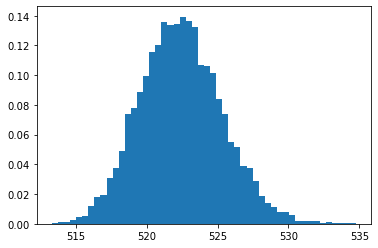

In [567]:
plt.hist(result,50,density=True)
plt.show()

*L'histogramme ressemble à une densité gaussienne, avec néanmoins une légère dissymétrie (plus de valeurs fortes).*

12. Donner un intervalle de confiance à 95% de la longueur du câble par 2 méthodes différentes. Commenter.

*1ère méthode : par approximation gaussienne. L'histogramme précédent suggère qu'une loi gaussienne peut bien représenter la loi conditionnelle de la longueur du cable. On obtient un intervalle de confiance en calculant la moyenne (milieu de l'intervalle) et l'écart type de l'échantillon de longueurs de câble puis en appliquant la formule du cours.*

In [568]:
Ln = sum(result)/K
sigman = np.std(result)
[Ln - sigman*1.96,Ln + sigman*1.96]

[516.7463121874626, 528.088414121593]

*2e méthode : on extrait les quantiles à 2.5% et 97.5% de l'échantillon, c'est-à-dire les valeurs $x_\alpha$ pour $\alpha \in \{0.025 ; 0.975\}$telles que* $$\mathbb{P}(L<x_\alpha) \approx \frac{1}{n}\sum_{i=1}^N 1_{\{L_i<x_\alpha\}}$$

In [569]:
np.quantile(result,[0.025,0.975])

array([517.03770904, 528.30326668])

*ATTENTION : ici l'utilisation du TCL tel qu'exposé au début du chapitre 5 fournissait un intervalle de confiance de l'**espérance de la longueur de câble** et non de la **longueur de câble** (erreur fréquente).*

*On voit par ailleurs que la 2e méthode est plus précise car elle est basée directement sur la loi empirique de l'échantillon*

13. Donner une estimation de la probabilité que la longueur du câble dépasse 525 m.

In [570]:
np.mean(result>525)

0.1828

14. Reprendre les questions précédentes avec 1000, 10000 puis 100000 simulations. Commenter

*cf. le commentaire de la question 10. On observe une stabilisation progressive des estimateurs des différentes quantités calculées : moyennes, quantiles, probabilité de dépassement de seuil.*

# Enoncé 2021 (Partie 2)

Nous nous plaçons dans le même cadre que ci-dessus. Nous tenons pour acquis les résultats précédents et allons maintenant approfondir l'analyse.

## Valeurs positives

1. A la question 7 de la partie 1, on peut s'apercevoir que certains profils de profondeur présentent des valeurs positives, ce qui n'a pas de sens si on considère qu'il n'y a pas de partie émergée entre les deux côtes. Proposer et implémenter un algorithme de type rejet qui ne génèrera que des valeurs négatives. Représenter un profil de profondeur généré.

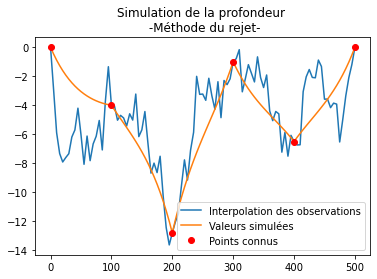

In [571]:
#On conserve l'algorithme de la Partie 1

Ec= mu+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-mu))
Cholesky = np.linalg.cholesky(SigmaCond)
x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
simu = Ec + np.matmul(Cholesky,x)

#On ajoute une boucle while pour le rejet, si toutes les valeurs ne sont pas négatives, on recalcule la matrice
#Recalculer seulement les valeurs positives aurait été plus rapide mais, selon nous, cela donnait moins de sens au calcul.

while (max(simu) > 0) :
    x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
    simu = Ec + np.matmul(Cholesky,x)
    
#On représente les valeurs comme précedemment.
    
allval3 = np.zeros(N)
allval3[unknown_indexes]=simu
allval3[observation_indexes]=depth
plt.plot(discretization,allval3)
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.title("Simulation de la profondeur \n -Méthode du rejet-")
plt.legend(["Interpolation des observations","Valeurs simulées","Points connus"])
plt.show()

2. L'emploi de cet algorithme a-t-il un impact sur la valeur moyenne de la longueur de câble ? Sur l'histogramme des longueurs de câble ? Sur l'intervalle de confiance obtenu par la méthode des quantiles ? Sur la probabilité de dépassement du seuil de 525 m? Donner une estimation du taux de rejet de l'algorithme. Considérer 10000 simulations.

In [572]:
#On itère 10000 fois l'algorithme de la question précédente

K2=10000
L525=0
result2 = np.zeros(K2)
Ec= mu+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-mu))
for i in range(K2):
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    allval3[unknown_indexes]=Ec + np.matmul(Cholesky,x)
    
#Algorithme de rejet------------------------------------------------------------------------------
    
    while (max(allval3[unknown_indexes]) > 0) :
        x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
        allval3[unknown_indexes]=Ec + np.matmul(Cholesky,x)
        
#--------------------------------------------------------------------------------------------------
        
    result2[i]=length(allval3,Delta)
    if result2[i]>=525:
        L525+=1
print("La longueur moyenne du câble était {} m avant et est maintenant {} m".format(sum(result)/K,sum(result2)/K2))
print("d'apres la loi forte des grands nombres, la probabilité de dépasser 525 m de cable est environ p=",np.mean(result2>525))

La longueur moyenne du câble était 522.4173631545278 m avant et est maintenant 521.783406348425 m
d'apres la loi forte des grands nombres, la probabilité de dépasser 525 m de cable est environ p= 0.127


Une moyenne de cable plus faible semble logique car le rejet empêche Zunk de sortir de l'eau donc une difference de profondeur plus faible entre les Zunk.
Cela impacte directement la probabilité de dépasser 525 m étant donné qu'on a translaté la gaussienne vers la gauche

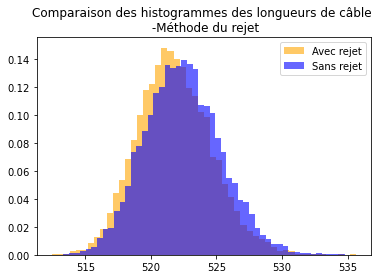

In [573]:
plt.hist(result2,50,density=True, color='orange',alpha=0.6)
plt.hist(result,50,density=True, color='blue', alpha = 0.6)
plt.title("Comparaison des histogrammes des longueurs de câble \n -Méthode du rejet")
plt.legend(["Avec rejet","Sans rejet"])
plt.show()

In [574]:
print("L'intervalle de confiance obtenu sans la méthode de rejet est [{},{}]".format(np.quantile(result,[0.025,0.975])[0],np.quantile(result,[0.025,0.975])[1]))
print("L'intervalle de confiance obtenu avec la méthode de rejet est [{},{}]".format(np.quantile(result2,[0.025,0.975])[0],np.quantile(result2,[0.025,0.975])[1]))

L'intervalle de confiance obtenu sans la méthode de rejet est [517.0377090409256,528.3032666777141]
L'intervalle de confiance obtenu avec la méthode de rejet est [516.6749559295732,527.6451470688539]


Cela n'a pas l'air de changer quelque chose, si ce n'est un léger décalage de la valeur moyenne vers des valeurs inférieures.

In [575]:
K=10000
result_bis = np.zeros(K)
Ec= mu+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-mu))
j = 0
for i in range(K):
    j+=1
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    allval3[unknown_indexes]=Ec + np.matmul(Cholesky,x)
    while (max(allval3[unknown_indexes]) > 0) :
        j+=1
        x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
        allval3[unknown_indexes]=Ec + np.matmul(Cholesky,x)
    result_bis[i]=length(allval3,Delta)
print("Le taux de rejet est de {}".format((j-K)/j))

Le taux de rejet est de 0.9619896155629718


## Approche Bayésienne

Dans la première partie, on a considéré que l'ensemble des paramètres du modèle était parfaitement connu. Toutes choses égales par ailleurs, on va maintenant considérer que la moyenne $\mu$ est issue d'une estimation entâchée d'une incertitude. Plus précisément, on va modéliser cette incertitude en considérant que $\mu \sim \mathcal{N}(-5,4)$.

On va également décomposer le vecteur $\mathbf{Z}$ en $\mathbf{Z} = (\mathbf{Z}_{\text{OBS}},\mathbf{Z}_{\text{UNK}})$. On notera $C_{\text{OBS}}$ et $C_{\text{UNK}}$ les matrices de covariance respectives de $\mathbf{Z}_{\text{OBS}}$ et $\mathbf{Z}_{\text{UNK}}$ ainsi que $C_{\text{OBS},\text{UNK}}$ la matrice des covariances entre ces deux vecteurs.

### Questions théoriques

3. Montrer que $\mu | \mathbf{Z}_{\text{OBS}}= \mathbf{z}_{\text{OBS}} \sim \mathcal{N}(\widehat{\mu},\widehat{\sigma}^2)$ avec
$$\widehat{\sigma}^2 = (\mathbf{1}^t C_{\text{OBS}}^{-1} \mathbf{1} + \frac1{4})^{-1},$$ 
où $\mathbf{1}$ est un vecteur de longueur 6 (soit la longueur du vecteur $\mathbf{Z}_{\text{OBS}}$) ne contenant que des 1 et 
$$\widehat{\mu} = \widehat{\sigma}^2 (\mathbf{1}^t C_{\text{OBS}}^{-1} \mathbf{z}_{\text{OBS}} - \frac{5}{4} )$$
Indication : écrire la densité jointe du vecteur $(\mathbf{Z}_{\text{OBS}},\mu)$, calculer $-2 \ln$ de cette densité puis identifier la forme quadratique faisant intervenir $\mu$.

#### ***Question 3***

Par formule de densité conditionnelle:
$f_{\mathbf{Z}_{OBS},\mu}(\mathbf{z}_{OBS},x)=f_{Zobs|\mu = x}(\mathbf{z}_{OBS}).f_{\mu}(x)$

Or $\mathbf{Z}_{OBS}|\mu = x  \sim \mathcal{N}(x \mathbf{1},C_{OBS})$ d'où:

$f_{Zobs,\mu}(\mathbf{z}_{OBS},x)= \frac{1}{\sqrt{2 \pi \sigma^2}}.\frac{1}{{2 \pi}^{\frac{n}{2}}\sqrt{|det(C_{OBS})| }}.e^{-\frac{1}{2}^t(\mathbf{z}_{OBS}-x.\mathbf{1}).C_{OBS}^{-1}.(\mathbf{z}_{OBS}-x.\mathbf{1})}.e^{-\frac{1}{2}\frac{(x+5)^2}{4}} \\= A.e^{\frac{1}{2}(x^2(^t\mathbf{1}. C_{OBS}^{-1}.\mathbf{1}+\frac{1}{4})+ 2x(\frac{1}{2}(^t\mathbf{z}_{OBS}.C_{OBS}^{-1}.\mathbf{1}+^t\mathbf{1}.C^{-1}_{OBS}.\mathbf{z}_{OBS}) +\frac{5}{4}) + C}=A.e^{\frac{1}{2}\frac{1}{\widehat{\sigma}^2}(x^2 + 2x\widehat{\sigma}^2(\frac{1}{2}(^t\mathbf{z}_{OBS}.C_{OBS}^{-1}.\mathbf{1}+^t\mathbf{1}.C^{-1}_{OBS}.\mathbf{z}_{OBS}) + \frac{5}{4}) + C')}$

où $A,C$ et $C'$ sont indépendant de $x$

Comme $C_{OBS}$ est une matrice de covariance elle est symétrique d'où:
$^t\mathbf{1}.C^{-1}_{OBS}.\mathbf{z}_{OBS}=^t\mathbf{z}_{OBS}.C_{OBS}^{-1}.\mathbf{1}$
Ainsi on peut réduire le facteur devant $2x$ à $\widehat{\mu}$
On peut donc factoriser en $f_{Zobs,\mu}(\mathbf{z}_{OBS},x)=B.e^{-\frac{1}{2}.\frac{(x-\hat{\mu})}{\hat{\sigma}}^{2}}$ où B est une constante de x ( mais pas de $z_{OBS}$). On peut donc calculer la loi marginale de $f_{Z_{OBS}}(z_{OBS})= \int_{\mathbb{R}}B.e^{-\frac{1}{2}.\frac{(x-\hat{\mu})}{\hat{\sigma}}^{2}}\mathrm{d}x=B.\sqrt{2 \pi \hat{\sigma}}$

Pour conclure on calcule la densité conditionnelle, le $B$ se simplifie et on trouve $\boxed{\mu |\mathbf{Z}_{OBS}=\mathbf{z}_{OBS}  \sim \mathcal{N}(\hat{\mu},\hat{\sigma}^2)}$

4. Montrer que si $X$, $Y$ et $Z$ sont trois vecteurs aléatoires à densité, alors $f_{X,Y|Z = z}(x,y) = f_{X|Y=y,Z=z}(x)f_{Y|Z=Z}(y)$

***Question 4***

On va utiliser les densités conditionnelles:

$\forall (x,y,z) \in \mathbb{R}^3:$

$f_{X,Y,Z}(x,y,z)=f_{Z}(z).f_{X,Y|Z=z}(x,y)=f_{Y,Z}(y,z).f_{X|Y=y,Z=z}(x)=f_{Z}(z).f_{Y|Z=z}(y).f_{X,Y|Z=z}(x,y)$ 

d'où (pour $F_Z(z) \neq 0$):

$\boxed{f_{X,Y|Z=z}(x,y)=f_{Y|Z=z}(y).f_{X,Y|Z=z}(x,y)}$

5. En déduire que la densité de $(\mathbf{Z}_{\text{UNK}},\mu) | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$ s'écrit comme le produit de $f_{\mu | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$ et de $f_{\mathbf{Z}_{\text{UNK}}| \mu = \mu^\star, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$ que l'on exprimera.

    Indication : $f_{\mathbf{Z}_{\text{UNK}}| \mu = \mu^\star, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$ est identique à la densité $f_{\mathbf{Z}_{\text{UNK}}| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$ utilisée dans la partie 1 avec $\mu = \mu^\star$

***Question 5***

On utilise la question précedente: $f_{\mathbf{Z}_{\text{UNK}},\mu | \mathbf{Z}_{\text{OBS}}}(\mathbf{z}_{\text{UNK}},\mu^{\star})=f_{\mu | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}(\mu^{\star}).f_{\mathbf{Z}_{\text{UNK}}| \mu = \mu^\star, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}(\mathbf{z}_{\text{UNK}})$

Soient $CS_{Z_{\text{UNK}}}$ et $\psi(z_{\text{OBS}})$ tels qu'ils sont définis dans le cours de PROBA III
On a $\boxed{\mathbf{Z}_{\text{UNK}},\mu | \mathbf{Z}_{\text{OBS}} \sim \mathcal{N} (\begin{pmatrix} \psi(z_{\text{OBS}})\\ \hat{\mu} \end{pmatrix}, \begin{pmatrix} CS_{Z_{\text{UNK}}} \ 0 \\ 0  \ \ \ \ \hat{\sigma} \end{pmatrix})}$


### Simulation

On va maintenant chercher à simuler les valeurs de $\mathbf{Z}_{\text{UNK}}$ en tenant compte de l'incertitude sur $\mu$.

En première approche, on pourrait chercher à obtenir la densité de $\mathbf{Z}_{\text{UNK}} | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$ en calculant 
$$\int_\mathbb{R} f_{(\mathbf{Z}_{\text{UNK}},\mu) | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}(\mathbf{z}_{\text{UNK}},\mu^\star) d\mu^\star$$
mais ce calcul a peu de chances d'aboutir.

On va plutôt procéder par simulations en cascade, c'est-à-dire que pour chaque simulation de $\mathbf{Z}_{\text{UNK}}$, on va d'abord générer une valeur $\mu^\star$ de $\mu$ selon $f_{\mu | \mathbf{Z}_{\text{OBS}}= \mathbf{z}_{\text{OBS}}}$ puis on simulera $\mathbf{Z}_{\text{UNK}}$ selon $f_{\mathbf{Z}_{\text{UNK}}| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}},\mu = \mu^\star}$.


6. Calculer $\widehat{\mu}$ et $\widehat{\sigma}^2$. 

In [576]:
#On utilise les formules obtenues à la question 3 :


vectUn=np.array([1,1,1,1,1,1])
vectUnT=vectUn.transpose()

CobsInv = np.linalg.inv(SigmaObs)
sigmaChap = sqrt(1/(np.dot(vectUnT,np.dot(CobsInv,vectUn))+0.25))
Zobs = depth.copy()
muChap = (sigmaChap**2)*(np.dot(vectUnT,np.dot(CobsInv,Zobs))-1.25)

print("On trouve : sigma chapeau = {} et mu chapeau = {}".format(sigmaChap, muChap))

On trouve : sigma chapeau = 1.2397140789215428 et mu chapeau = -4.291350330933772


7. Calculer la probabilité de $\{\mu| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}} > 0\}$. Proposer et implémenter un algorithme de simulation de $\mu| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}, \mu <0$.

On sait d'après la question 3 (de la partie 2) que $\mu | \mathbf{Z}_{\text{OBS}}= \mathbf{z}_{\text{OBS}} \sim \mathcal{N}(\widehat{\mu},\widehat{\sigma}^2)$. 
Aussi, $f_{\mu | Z_{obs}=z_{obs}}(x)=\frac{1}{\sqrt{2 \pi} \hat{\sigma}} exp(- \frac{(x-\hat{\mu})^2}{2\hat{\sigma}^2})$
On a donc : $P(\{\mu | Z_{obs}=z_{obs} > 0\}) = \int_0^{+\infty}\frac{1}{\sqrt{2 \pi} \hat{\sigma}} exp(- \frac{(x-\hat{\mu})^2}{2\hat{\sigma}^2})dx$. Avec le changement de variable : $t=\frac{x-\hat{\mu}}{\sqrt{2}\hat{\sigma}}$, il vient : $P(\{\mu | Z_{obs}=z_{obs} > 0\}) = \frac{\sqrt{2}\hat{\sigma}}{\sqrt{2 \pi} \hat{\sigma}} \int_{\frac{- \hat{\mu}}{\sqrt{2}\hat{\sigma}}}^{+\infty}exp(-t^2)dt$. Soit : $\boxed{P(\{\mu | Z_{obs}=z_{obs} > 0\}) = \frac{1}{\sqrt{\pi}} \int_{\frac{- \hat{\mu}}{\sqrt{2}\hat{\sigma}}}^{+\infty}exp(-t^2)dt}$

In [577]:
#On cherche à calculer la valeur de l'intégrale obtenue, on le fait numériquement :

from scipy.integrate import quad

def f(x) :
    return(exp(-x**2))

borneInf = -muChap/(sqrt(2)*sigmaChap)
resIntegrale = quad(f,borneInf,np.inf)[0]
proba = (1/sqrt(np.pi))*resIntegrale

print("La probabilité d'avoir mu (sachant Z_obs=z_obs) supérieur à 0 est de {}".format(proba))

La probabilité d'avoir mu (sachant Z_obs=z_obs) supérieur à 0 est de 0.0002685226388111976


On propose, pour simuler $\mu| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}, \mu <0$, d'utiliser la méthode de Box-Muller, en le couplant à une méthode de rejet, pour s'assurer $\mu <0$.

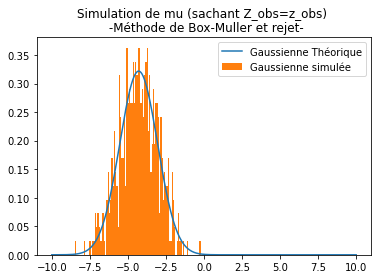

In [578]:
#Implémentation de l'algorithme

import scipy.stats as sps

#On implémente l'algorithme de Box-Muller :

u = np.random.rand(500)
v = np.random.rand(500)
X=np.sqrt(-2*np.log(u))*np.cos(2*np.pi*v)

#On calcule Y à partir de la loi normale obtenue avec l'algorithme de Box-Muller

Y=(X*sigmaChap+muChap)

#Algorithme de rejet -------------------------------------------------------------------------------------

while (max(Y)>=0):
    u = np.random.rand(500)
    v = np.random.rand(500)
    X=np.sqrt(-2*np.log(u))*np.cos(2*np.pi*v)
    Y=(X*sigmaChap+muChap)

#--------------------------------------------------------------------------------------------------------

x=np.linspace(-10,10,1000)
f_x=sps.norm.pdf((x-muChap)/sigmaChap)/sigmaChap
plt.title("Simulation de mu (sachant Z_obs=z_obs) \n -Méthode de Box-Muller et rejet-")
plt.plot(x,f_x)
plt.hist(Y, 100, density=True)
plt.legend(["Gaussienne Théorique","Gaussienne simulée"])
plt.show()

8. Générer un couple $\mathbf{Z}_{\text{UNK}}, \mu| \mathbf{Z}_{\text{OBS}}, \mu <0$ et représenter le profil de profondeur obtenu. On prendra soin de ne générer que des valeurs négatives de $\mathbf{Z}_{\text{UNK}}$ en utilisant l'algorithme de la section précédente.

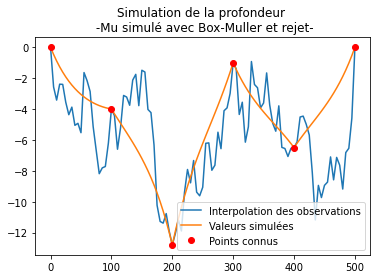

In [579]:
#On utilise l'algorithme de la question précédente pour calculer seulement une valeur de mu étoile

u = np.random.rand(1)
v = np.random.rand(1)
X=np.sqrt(-2*np.log(u))*np.cos(2*np.pi*v)
muEtoile=(X*sigmaChap+muChap)
Ec= muEtoile+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-muEtoile))
Cholesky = np.linalg.cholesky(SigmaCond)
x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
simu = Ec + np.matmul(Cholesky,x)

#Algorithme de rejet-----------------------------------------------------------------------------------------

while (max(muEtoile)>=0)or(max(simu)>0):
    u = np.random.rand(1)
    v = np.random.rand(1)
    X=np.sqrt(-2*np.log(u))*np.cos(2*np.pi*v)
    muEtoile=(X*sigmaChap+muChap)
    Ec= muEtoile+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-muEtoile))
    Cholesky = np.linalg.cholesky(SigmaCond)
    x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
    simu = Ec + np.matmul(Cholesky,x)
    
#------------------------------------------------------------------------------------------------------------
    
allval3 = np.zeros(N)
allval3[unknown_indexes]=simu
allval3[observation_indexes]=depth
plt.plot(discretization,allval3)
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.title("Simulation de la profondeur \n -Mu simulé avec Box-Muller et rejet-")
plt.legend(["Valeurs simulées","Interpolation des observations","Points connus"])
plt.show()

9. Générer 10000 profils de profondeur et calculer les longueurs de câble associées. Comparer la valeur moyenne de la longueur de câble, dont on visualisera la convergence, l'histogramme des longueurs de câble, l'intervalle de confiance obtenu par la méthode des quantiles, la probabilité de dépassement du seuil de 525 m avec les résultats obtenus précédemment. Commenter.

In [580]:
#On utilise l'algorithme précédent pour 10000 simulations

K3=10000
result3 = np.zeros(K3)
for i in range(K3):
    u = np.random.rand(1)
    v = np.random.rand(1)
    X=np.sqrt(-2*np.log(u))*np.cos(2*np.pi*v)
    muEtoile=(X*sigmaChap+muChap)
    Ec= muEtoile+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-muEtoile))
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    allval3[unknown_indexes]=Ec + np.matmul(Cholesky,x)
    while muEtoile>=0 or max(allval3[unknown_indexes])>0 :
        u = np.random.rand(1)
        v = np.random.rand(1)
        X=np.sqrt(-2*np.log(u))*np.cos(2*np.pi*v)
        muEtoile=(X*sigmaChap+muChap)
        Ec= muEtoile+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-muEtoile))
        x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
        allval3[unknown_indexes]=Ec + np.matmul(Cholesky,x)
    result3[i]=length(allval3,Delta)
print("La longueur moyenne du câble était {} m en premier, puis {} m et est maintenant {} m".format(sum(result)/K,sum(result2)/K2, sum(result3)/K3))

La longueur moyenne du câble était 522.4173631545278 m en premier, puis 521.783406348425 m et est maintenant 521.8015159268053 m


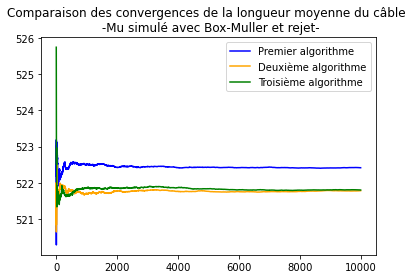

In [581]:
indice_simu = 1+np.arange(K)
plt.plot(indice_simu,np.cumsum(result)/indice_simu,color='blue')
plt.plot(indice_simu,np.cumsum(result2)/indice_simu,color='orange')
plt.plot(indice_simu,np.cumsum(result3)/indice_simu,color='green')
plt.legend(["Premier algorithme","Deuxième algorithme","Troisième algorithme"])
plt.title("Comparaison des convergences de la longueur moyenne du câble \n -Mu simulé avec Box-Muller et rejet-")
plt.show()

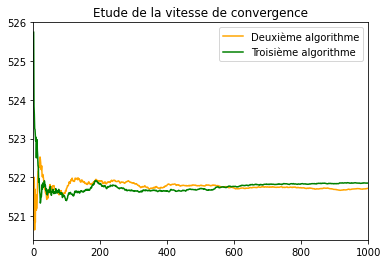

La troisieme méthode met plus longtemps a converger vers son esperance


In [582]:
indice_simu = 1+np.arange(K)
plt.plot(indice_simu,np.cumsum(result2)/indice_simu,color='orange')
plt.plot(indice_simu,np.cumsum(result3)/indice_simu,color='green')
plt.plot(521.78,color='black')
plt.legend(["Deuxième algorithme","Troisième algorithme"])
plt.title("Etude de la vitesse de convergence")
plt.xlim(0,1000)
plt.show()
print('La troisieme méthode met plus longtemps a converger vers son esperance')

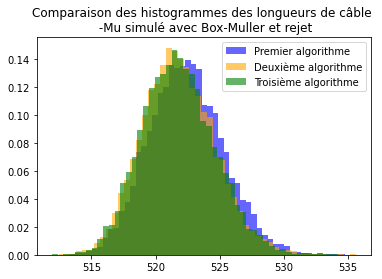

In [583]:
plt.hist(result,50,density=True,color='blue',alpha=0.6)
plt.hist(result2,50,density=True,color='orange',alpha=0.6)
plt.hist(result3,50,density=True,color='green',alpha=0.6)
plt.title("Comparaison des histogrammes des longueurs de câble \n -Mu simulé avec Box-Muller et rejet")
plt.legend(["Premier algorithme","Deuxième algorithme","Troisième algorithme"])
plt.show()

In [584]:
print("L'intervalle de confiance obtenu avec le premier algorithme est [{},{}]".format(np.quantile(result,[0.025,0.975])[0],np.quantile(result,[0.025,0.975])[1]))
print("L'intervalle de confiance obtenu avec le deuxième algorithme est [{},{}]".format(np.quantile(result2,[0.025,0.975])[0],np.quantile(result2,[0.025,0.975])[1]))
print("L'intervalle de confiance obtenu avec le troisième algorithme est [{},{}]".format(np.quantile(result3,[0.025,0.975])[0],np.quantile(result3,[0.025,0.975])[1]))

L'intervalle de confiance obtenu avec le premier algorithme est [517.0377090409256,528.3032666777141]
L'intervalle de confiance obtenu avec le deuxième algorithme est [516.6749559295732,527.6451470688539]
L'intervalle de confiance obtenu avec le troisième algorithme est [516.6247879163376,527.6916780229686]


In [585]:
print("La probabilité de dépassemet du seuil à 525 est égale à {} avec le premier algortihme".format(np.mean(result>525)))
print("La probabilité de dépassemet du seuil à 525 est égale à {} avec le deuxième algorithme".format(np.mean(result2>525)))
print("La probabilité de dépassemet du seuil à 525 est égale à {} avec le troisèe algorithme".format(np.mean(result3>525)))

La probabilité de dépassemet du seuil à 525 est égale à 0.1828 avec le premier algortihme
La probabilité de dépassemet du seuil à 525 est égale à 0.127 avec le deuxième algorithme
La probabilité de dépassemet du seuil à 525 est égale à 0.1326 avec le troisèe algorithme


La comparaison des résultats des 3 algorithmes montre que les deuxième et troisième algorithme sont assez proches (ils ont tous les deux une valeur moyenne légèrement plus faible que le premier algorithme). Cependant entre les 3 algorithme il n'y a pas pour autant de différence très marquée.
Le fait que la probabilité d'avoir plus de 525m de câble à dérouler soit bien plus faible qu'au début est probablement dû au fait que l'on rejette les valeurs trop hautes de $\mu$ ainsi que les valeurs trop hautes de $Z_{UNK}$.

10. Qu'adviendrait-il selon vous si on rendait également aléatoires les autres paramètres du modèle $\sigma^2$ et $a$ ?

***Question 10***

Si $\sigma^2$ et $a$ étaient également aléatoires, on peut supposer que les valeurs prises par le vecteur $Z_{\text{UNK}}$ seraient plus vaste, qu'il y aurait plus de fluctuation entre les profondeurs prises. En effet, si $\sigma$ est une varaible aléatoire, avec un tirage $\sigma^{\star}>\sigma_0$ on pourrait s'attendre a une longueur de cable plus élevée.

11. (facultatif) On suppose désormais que $\alpha = \frac1{\sigma^2} \sim \Gamma(a_1,a_2)$, où $\sigma^2$ correspond au paramètre qui intervient dans la fonction $C$. Donner l'expression de la densité de $\alpha | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$,  de $\mu | \alpha, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}},$ et de $\mathbf{Z}_{\text{UNK}} | \mu, \alpha, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$. Proposer un algorithme de simulation tenant compte de l'incertitude sur le paramètre $\alpha$ et analyser son impact sur les différentes quantités évaluées.

    Indication : Pour identifier la densité de $\alpha | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}$, exprimer d'abord la densité jointe de $(\alpha,\mu, \mathbf{Z}_{\text{OBS}})$ puis marginaliser pour obtenir la densité de $(\alpha,\mathbf{Z}_{\text{OBS}})$


***Question 11***

$\underline{\text{Calcul de la densité de } \alpha | Z_{\text{OBS}}} \newline$

Nous allons proceder comme pour la question 3.

On remarque d'abord que $C_{OBS}=\frac{1}{\alpha^*}.D$ où $[D]_{ij}=e^{-\frac{|hi-hj|}{a}}$ d'ou $\hat{\sigma}^2=\beta.\sigma^2=\beta.\frac{1}{\alpha}$


La densité jointe de $\alpha$, $\mu$ et $\mathbf{Z}_{\text{OBS}}$ à pour densité: $\newline$
$f_{\alpha,\mu,\mathbf{Z}_{\text{OBS}}}(\alpha^{\star},\mu^{\star},\mathbf{z}_{\text{OBS}})=f_{\alpha}(\alpha^{\star}).f_{\mu}(\mu^{\star}).f_{\mathbf{Z}_{\text{OBS}}|\alpha,\mu}(\mathbf{z}_{\text{OBS}})$ par indépendance de $\alpha$ et $\mu$
$\newline$ D'ou:
$f_{\alpha,\mu,\mathbf{Z}_{\text{OBS}}}(\alpha^{\star},\mu^{\star},\mathbf{z}_{\text{OBS}})=A.\alpha^{\star}.e^{-\frac{1}{2}\frac{(\mu^{\star}-\hat{\mu})^2}{\beta.\frac{1}{\alpha^{\star}}}}.{\alpha^{\star}}^{a_1-1}e^{-a_2.\alpha^{\star}}$
Ainsi, en intégrant selon $\mu$, on obtient la loi marginale:

$f_{\alpha,\mathbf{Z}_{\text{OBS}}}(\alpha^{\star},\mathbf{z}_{\text{OBS}})=A.\sqrt{2 \pi \beta}.{\alpha^{\star}}^{a_1+\frac{1}{2}-1}e^{-a_2.\alpha^{\star}}$

Et comme pour la question 3, on calcule la loi marginale de $Z_{OBS}$ et on obtient une densité $f_{Zobs}=A.\sqrt{2 \pi \beta}.\Gamma(a_1+\frac{1}{2})$ de sorte que : $\boxed{\alpha | \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}} \sim \mathcal{\Gamma}(a_1+\frac{1}{2},a_2)}$


$\underline{\text{Calcul de la densité de } \mu | \alpha , \mathbf{Z}_{\text{OBS}}} \newline$

Les densités conditionnelles donnent:

$f_{\mu|\alpha,\mathbf{Z}_{\text{OBS}}}(\mu^{\star})=\frac{f_{\alpha,\mu,\mathbf{Z}_{\text{OBS}}}(\alpha^{\star},\mu^{\star},\mathbf{z}_{\text{OBS}})}{f_{\alpha,\mathbf{Z}_{\text{OBS}}}(\alpha^{\star},\mathbf{z}_{\text{OBS}})}=\frac{\sqrt{\alpha^{\star}}}{\sqrt{2 \pi}}.e^{-\frac{1}{2}\frac{(\mu^{\star}-\hat{\mu})^2}{\beta.\frac{1}{\alpha^{\star}}}}$ 
$\newline$ 
Directement:

$\boxed{\mu|\alpha=\alpha^{\star},\mathbf{Z}_{\text{OBS}} \sim \mathcal{N}(\hat{\mu},\frac{\beta}{\alpha^{\star}})}$

$\underline{\text{Calcul de la densité de } \mathbf{Z}_{\text{UNK}} | \mu, \alpha, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$ $\newline$

Comme à la question 5:
$f_{\mathbf{Z}_{\text{UNK}}| \alpha=\alpha^{\star}, \mu = \mu^\star, \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$ est identique à la densité $f_{\mathbf{Z}_{\text{UNK}}| \mathbf{Z}_{\text{OBS}} = \mathbf{z}_{\text{OBS}}}$ utilisée dans la partie 1 avec $\alpha = \alpha^{\star}$ et $\mu = \mu^\star$

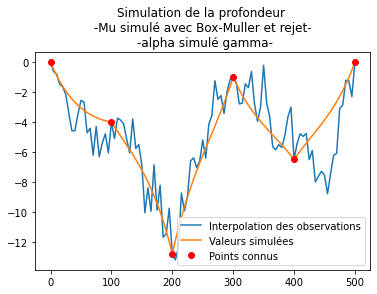

In [586]:
beta = (sigmaChap/2)**2
a1 = 100
a2 = 0.25/a1
#On veut que aEtoile soit centré sur 1/sigma² = 0.25 donc E(Gamma) = a1*a2 = 0.25

aEtoile = np.random.gamma(a1,a2)

SigmaTilde = np.sqrt(beta /aEtoile)

#On remplace sigmachap par sigmatilde

u = np.random.rand(1)
v = np.random.rand(1)
X=np.sqrt(-2*np.log(u))*np.cos(2*np.pi*v)
muEtoile=(X*SigmaTilde+muChap)

Ec= muEtoile+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-muEtoile))
Cholesky = np.linalg.cholesky(SigmaCond)
x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
simu = Ec + np.matmul(Cholesky,x)

#Algorithme de rejet-----------------------------------------------------------------------------------------

while (max(muEtoile)>=0)or(max(simu)>0):
    aEtoile = np.random.gamma(a1,a2)
    SigmaTilde = beta /aEtoile
    u = np.random.rand(1)
    v = np.random.rand(1)
    X=np.sqrt(-2*np.log(u))*np.cos(2*np.pi*v)
    muEtoile=(X*SigmaTilde+muChap)
    
    Ec= muEtoile+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-muEtoile))
    Cholesky = np.linalg.cholesky(SigmaCond)
    x = np.random.normal(0,1,np.shape(unknown_indexes)[0])
    simu = Ec + np.matmul(Cholesky,x)

#------------------------------------------------------------------------------------------------------------
    
allval3 = np.zeros(N)
allval3[unknown_indexes]=simu
allval3[observation_indexes]=depth
plt.plot(discretization,allval3)
plt.plot(discretization,allval1)
plt.plot(discretization[observation_indexes], depth, 'ro')
plt.title("Simulation de la profondeur \n -Mu simulé avec Box-Muller et rejet- \n -alpha simulé gamma-")
plt.legend(["Interpolation des observations","Valeurs simulées","Points connus"])
plt.show()

In [587]:
#On utilise l'algorithme précédent pour 10000 simulations
beta = (sigmaChap/2)**2
a1 = 10
a2 = 0.25/a1
aEtoile = np.random.gamma(a1,a2)
SigmaTilde = np.sqrt(beta /aEtoile)
K4=10000
result4 = np.zeros(K4)
for i in range(K4):

    aEtoile = np.random.gamma(a1,a2)
    SigmaTilde = np.sqrt(beta /aEtoile)
    u = np.random.rand(1)
    v = np.random.rand(1)
    X=np.sqrt(-2*np.log(u))*np.cos(2*np.pi*v)
    muEtoile=(X*SigmaTilde+muChap)
    Ec= muEtoile+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-muEtoile))
    x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
    allval3[unknown_indexes]=Ec + np.matmul(Cholesky,x)
    while muEtoile>=0 or max(allval3[unknown_indexes])>0 :
        u = np.random.rand(1)
        v = np.random.rand(1)
        X=np.sqrt(-2*np.log(u))*np.cos(2*np.pi*v)
        muEtoile=(X*SigmaTilde+muChap)
        Ec= muEtoile+np.matmul(np.transpose(SigmaObsUnknown),np.matmul(np.linalg.inv(SigmaObs),depth-muEtoile))
        x=np.random.normal(0,1,np.shape(unknown_indexes)[0])
        allval3[unknown_indexes]=Ec + np.matmul(Cholesky,x)
    result4[i]=length(allval3,Delta)
print("La longueur moyenne du câble était {} m en premier, {} m si on ajoute le rejet, {} m où on ajoute mu gaussien, et {} m où de plus 1/sigma² suit gamma".format(sum(result)/K,sum(result2)/K2, sum(result3)/K3,sum(result4)/K4))

La longueur moyenne du câble était 522.4173631545278 m en premier, 521.783406348425 m si on ajoute le rejet, 521.8015159268053 m où on ajoute mu gaussien, et 521.8417488869682 m où de plus 1/sigma² suit gamma


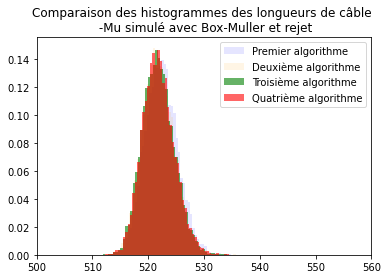

In [588]:
plt.hist(result,50,density=True,color='blue',alpha=0.1)
plt.hist(result2,50,density=True,color='orange',alpha=0.1)
plt.hist(result3,50,density=True,color='green',alpha=0.6)
plt.hist(result4,50,density=True,color='red',alpha=0.6)
plt.title("Comparaison des histogrammes des longueurs de câble \n -Mu simulé avec Box-Muller et rejet")
plt.legend(["Premier algorithme","Deuxième algorithme","Troisième algorithme","Quatrième algorithme"])
plt.xlim(500,560)
plt.show()

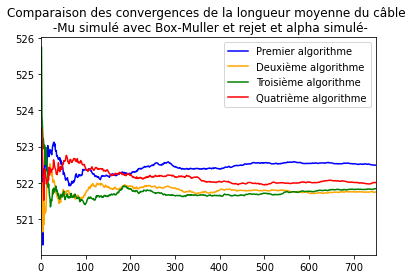

In [589]:
indice_simu = 1+np.arange(K)
plt.plot(indice_simu,np.cumsum(result)/indice_simu,color='blue')
plt.plot(indice_simu,np.cumsum(result2)/indice_simu,color='orange')
plt.plot(indice_simu,np.cumsum(result3)/indice_simu,color='green')
plt.plot(indice_simu,np.cumsum(result4)/indice_simu,color="red")
plt.legend(["Premier algorithme","Deuxième algorithme","Troisième algorithme","Quatrième algorithme"])
plt.title("Comparaison des convergences de la longueur moyenne du câble \n -Mu simulé avec Box-Muller et rejet et alpha simulé-")
plt.xlim(0,750)
plt.show()

***CONCLUSION***

Comme supposé à la question 10, avec un écart type $\sigma^{\star}$ assez grand (on peut l'obtenir avec des paramètres de la loi gamma), l'historigramme s'étale et se translate vers la droite ($L_{moy}$ plus grand). Cependant l'écart n'est pas très grand, on se rend compte que la premiere estimation (avec rejet) est en fait très fiable. 